# **Perceptron Multicapa usando Keras**




En este proyecto Vvamos a construir una red neuronal multicapa. Usaremos el dataset Fashion Mnist, el cual contiene imagenes de 28x28 pixeles, en escala de grises, representando la intensidad con valores de 0 a 255.


In [4]:
#Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [6]:
#Carga de datos Fashion Mnist
fashion_mist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mist.load_data()

In [7]:
#Exploracion de los datos
print("Datos de entrenamiento: ", x_train.shape)
print("Datos de testing: ", x_test.shape)

Datos de entrenamiento:  (60000, 28, 28)
Datos de testing:  (10000, 28, 28)


Tipo de dato:  uint8


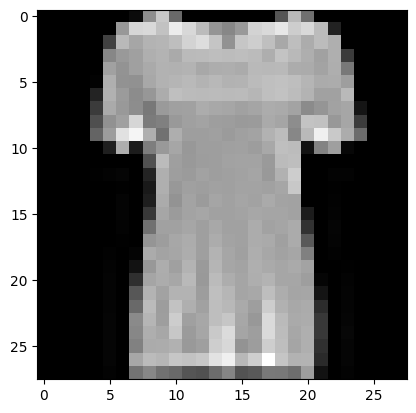

In [8]:
print("Tipo de dato: ", x_train.dtype)
plt.imshow(x_train[10,:,:], cmap = "gray")

Dado que los datos son imágenes en escala de grises, con valores entre 0 a 255, vamos a normalizar los datos de 0 a 1. Esto dado que vamos a usar el algoritmo de gradiente descendente durante el entrenamiento.

Adicionalmente, vamos a separar una porción de los datos para validación. El dataset original incluye la división de los datos entre entrenamiento y prueba.

In [9]:
#Normalizacion de datos
x_valid, x_train = x_train[:5000] / 255, x_train[5000:] / 255
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255

In [10]:
#Nombre de las clases
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Ahora, vamos a construir la red neuronal multicapa (MLP) empleando el modelo Sequential API de Keras. Este modelo permite crear una pila de capas simples.

Entre los tipos de capas que podemos crear se encuentra:

In [12]:
#Construccion del MLP
model = keras.models.Sequential([
    #La primera capa convertira la image (28x28 pixeles)
    #a un arreglo de una dimension
    keras.layers.Flatten(input_shape=[28, 28]),
    #La siguiente capa correspondera a una capa oculta
    #con 300 neuronas y funcion de activacion ReLU
    keras.layers.Dense(300, activation="relu"),
    #La siguiente capa es otra capa oculta con 100 neuronas
    #y la misma funcion de activacion
    keras.layers.Dense(100, activation="relu"),
    #Finalmente, agregamos la capa de salida con una neurona por clase
    #Empleamos la funcion de activacion softmax
    keras.layers.Dense(10, activation="softmax")
])
#Vamos a revisar el modelo
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Exploremos un poco las capas del modelo:

In [13]:
#Podemos acceder a la lista de capas:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
#Revisar los pesos y bias de cada capa
hidden1 = model.layers[1]
#Mostrar los pesos
weigths, biases = hidden1.get_weights()
print("Pesos: ", weigths)

Pesos:  [[-0.06160186 -0.06942798 -0.06870903 ... -0.02954241  0.01491918
   0.03048846]
 [-0.00868921  0.01087664  0.0242601  ... -0.01811616 -0.0498357
   0.0673143 ]
 [ 0.01938543 -0.00265497  0.02366047 ... -0.05138007 -0.04389782
   0.00777801]
 ...
 [ 0.00266311 -0.03558746  0.00789006 ... -0.03689775 -0.05632984
  -0.03329885]
 [-0.04390708  0.02398852 -0.06624902 ...  0.03540405  0.05870283
   0.00333961]
 [ 0.00889944 -0.05738435  0.03984492 ... -0.04657545  0.0191161
  -0.00557244]]


In [15]:
#Mostrar biases
print("Bias: ", biases)

Bias:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
#Vamos a compilar el modelo
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [17]:
#Una vez compilado, esta listo para ser entrenado
#a traves del metodo fit
#Le enviamos los datos de entrenamiento, el numero
#de epocas, y el set de validacion (opcional)
history = model.fit(x_train, y_train, epochs = 30,
                    validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6787 - loss: 1.0144 - val_accuracy: 0.8260 - val_loss: 0.5156
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8237 - loss: 0.5079 - val_accuracy: 0.8546 - val_loss: 0.4347
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8400 - loss: 0.4526 - val_accuracy: 0.8646 - val_loss: 0.4079
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8545 - loss: 0.4170 - val_accuracy: 0.8622 - val_loss: 0.3992
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8592 - loss: 0.4001 - val_accuracy: 0.8584 - val_loss: 0.4118
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8615 - loss: 0.3868 - val_accuracy: 0.8640 - val_loss: 0.3818
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8684 - loss: 0.3704 - val_accuracy: 0.8656 - val_loss: 0.3870
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8756 - loss: 0.3538 - 

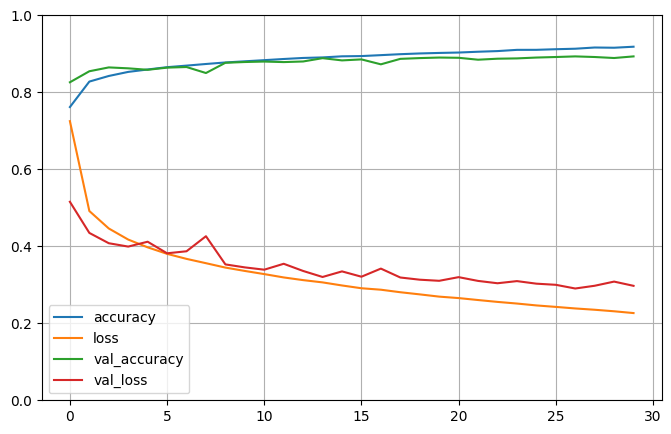

In [18]:
#Grafica de curva de aprendizaje
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [19]:
#Evaluacion del modelo
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8842 - loss: 0.3351


[0.3296162784099579, 0.885200023651123]

In [20]:
#Usando el modelo para hacer predicciones
x_new = x_test[:3]
x_proba = model.predict(x_new)
x_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


'Trouser'

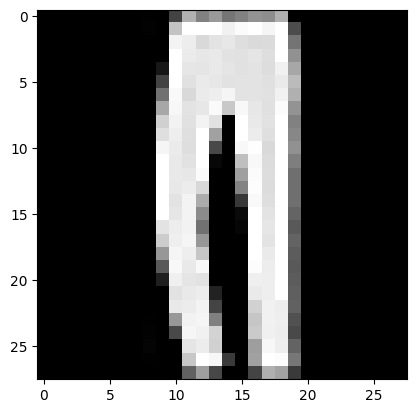

In [21]:
#Grafiquemos una de las muestras con su correspondiente clase
y_new = np.argmax(model.predict(x_new), axis=-1)
plt.imshow(x_new[2,:,:], cmap = "gray")
class_names[y_new[2]]